In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import scipy.integrate as integrate
%matplotlib inline

In [106]:
b=2
mu=5
def Densidad(x):
    if x>0:
        return (1/(m.gamma(mu/b)*(b**(mu/b))))*(x**((mu/b)-1))*m.exp(-x/b)
    else:
        return 0

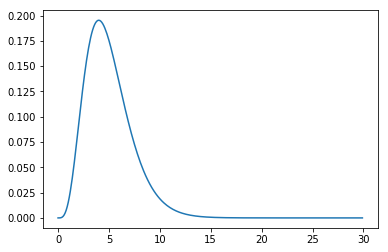

In [96]:
Y = [Densidad(x) for x in np.arange(0,30,0.1)]
X = np.arange(0,30,0.1)
plt.plot(X,Y)

In [126]:
def sim(f,E,n):
    R = []
    Y = [0]+[integrate.quad(f,-np.inf,x)[0] for x in E]
    for i in range(n):
        u = np.random.uniform()
        R.append(max([E[x] for x in range(len(E)) if Y[x]<u]))
    return R

In [98]:
%%time
Y1 = sim(Densidad,np.arange(0.1,30,0.1),100000)

CPU times: user 4.1 s, sys: 2.52 ms, total: 4.11 s
Wall time: 4.29 s


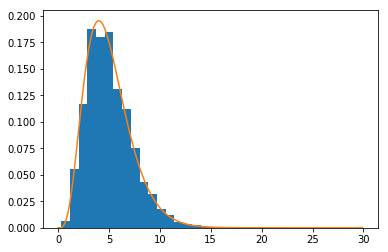

In [99]:
plt.hist(Y1,density=True,bins=23)
plt.plot(X,Y)

In [72]:
def VarianzaAsintotica(f,p,E,I,n,k):
    L = []
    for i in range(k):
        L.append(m.sqrt(n)*(E(sim(f,I,n))-p))
    plt.hist(L)
    return np.var(L)

In [160]:
np.mean(sim(Densidad,np.arange(0,60,.01),1000))

4.16421

CPU times: user 3min 43s, sys: 496 ms, total: 3min 44s
Wall time: 3min 45s


8.751428615639998

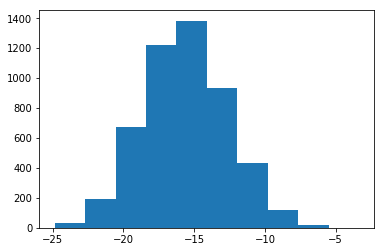

In [161]:
%%time
VarianzaAsintotica(Densidad,5,lambda x: np.mean(x),np.arange(0,60,1),1000,5000)

In [75]:
def ARE(f,E1,E2,I,p,n,k):
    return VarianzaAsintotica(f,p,E1,I,n,k)/VarianzaAsintotica(f,p,E2,I,n,k)